In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN

In [2]:
df = pd.read_csv(r'C:\Users\91916\Desktop\VARUN\python_guvi\guvi\Datasets\synthetic_sensor_data.csv')

In [3]:
df

,Timestamp,Temperature,Anomaly,Location
0,2024-06-01 19:50:28,24.476332,0,SensorB
1,2024-06-01 19:50:28,18.253966,0,SensorA
2,2024-06-01 19:50:28,14.953520,0,SensorB
3,2024-06-01 19:50:28,17.667181,0,SensorA
4,2024-06-01 19:50:28,17.079826,0,SensorA
...,...,...,...,...
9995,2024-06-01 19:50:29,26.460733,0,SensorA
9996,2024-06-01 19:50:29,22.027875,0,NaN
9997,2024-06-01 19:50:29,17.917821,0,SensorA
9998,2024-06-01 19:50:29,23.730639,0,SensorB


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    10000 non-null  object 
 1   Temperature  10000 non-null  float64
 2   Anomaly      10000 non-null  int64  
 3   Location     6704 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 312.6+ KB


In [5]:
df.isnull().sum()

Timestamp         0
Temperature       0
Anomaly           0
Location       3296
dtype: int64

In [6]:
df['Location'].mode()

0    SensorB
Name: Location, dtype: object

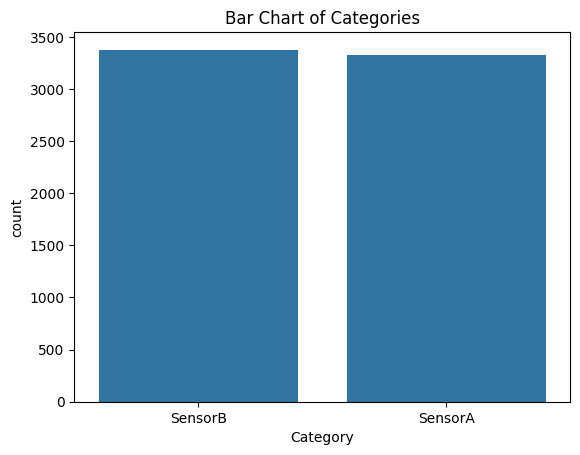

In [7]:
sns.countplot(x='Location', data=df)
plt.title('Bar Chart of Categories')
plt.xlabel('Category')
plt.show()

In [8]:
# Step 1: Identify the column with null values
null_column = 'Location'

# Step 2: Generate random choices to fill null values
# Define the two types of data you want to use
choices = ['SensorA', 'SensorB']

# Generate random choices for the number of null values
random_choices = np.random.choice(choices, size=df[null_column].isnull().sum())

# Step 3: Fill the null values with the random choices
df.loc[df[null_column].isnull(), null_column] = random_choices

print("\nDataFrame after filling null values randomly with two types of data:")
print(df)



DataFrame after filling null values randomly with two types of data:
                Timestamp  Temperature  Anomaly Location
0     2024-06-01 19:50:28    24.476332        0  SensorB
1     2024-06-01 19:50:28    18.253966        0  SensorA
2     2024-06-01 19:50:28    14.953520        0  SensorB
3     2024-06-01 19:50:28    17.667181        0  SensorA
4     2024-06-01 19:50:28    17.079826        0  SensorA
...                   ...          ...      ...      ...
9995  2024-06-01 19:50:29    26.460733        0  SensorA
9996  2024-06-01 19:50:29    22.027875        0  SensorA
9997  2024-06-01 19:50:29    17.917821        0  SensorA
9998  2024-06-01 19:50:29    23.730639        0  SensorB
9999  2024-06-01 19:50:29    25.680470        0  SensorB

[10000 rows x 4 columns]


In [9]:
df.isnull().sum()

Timestamp      0
Temperature    0
Anomaly        0
Location       0
dtype: int64

In [10]:
df['Timestamp'].unique()

array(['2024-06-01 19:50:28', '2024-06-01 19:50:29'], dtype=object)

In [11]:
df.Timestamp.value_counts()

Timestamp
2024-06-01 19:50:29    9802
2024-06-01 19:50:28     198
Name: count, dtype: int64

In [12]:
df['Location'].unique()

array(['SensorB', 'SensorA'], dtype=object)

In [13]:
mapping = {'SensorA' : 0, 'SensorB' : 1}
df.replace({'Location': mapping}, inplace=True)

C:\Users\91916\AppData\Local\Temp\ipykernel_14800\143652361.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Location': mapping}, inplace=True)


In [14]:
df['Location'].unique()

array([1, 0], dtype=int64)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    10000 non-null  object 
 1   Temperature  10000 non-null  float64
 2   Anomaly      10000 non-null  int64  
 3   Location     10000 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 312.6+ KB


In [16]:
# find outliers - box plot & skewed data - hist plot and violin plot

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

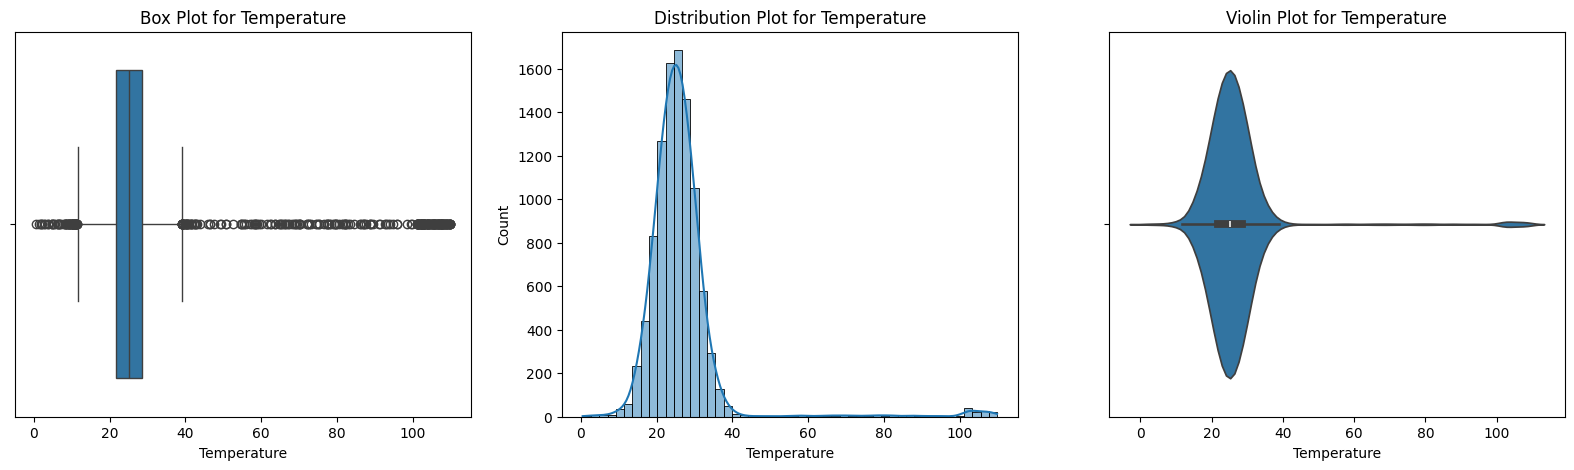

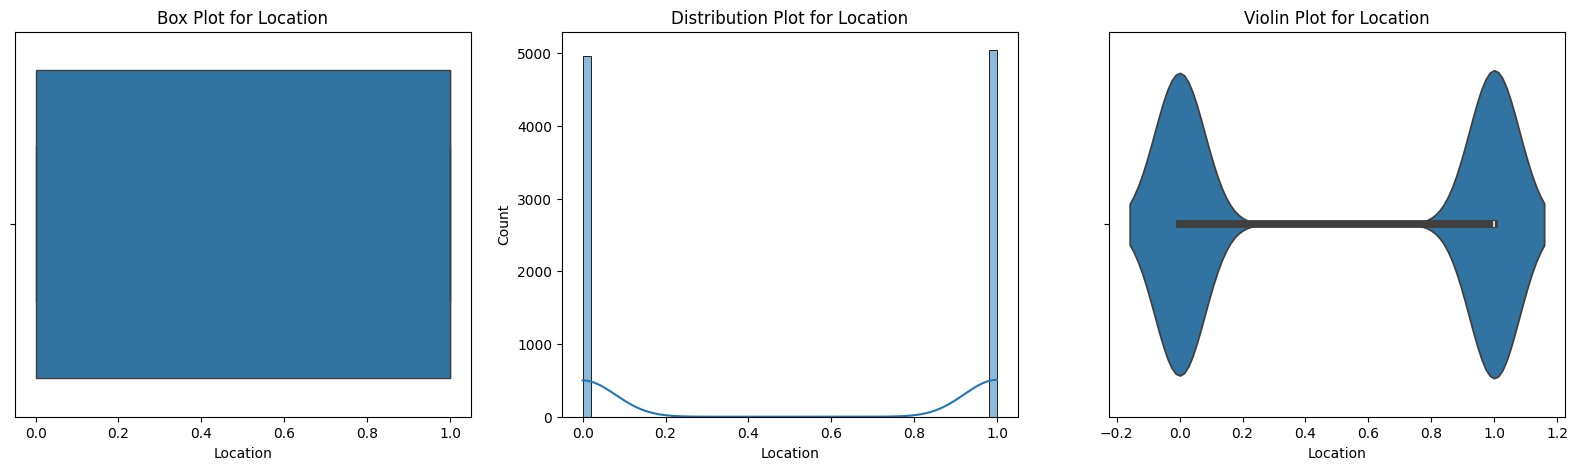

In [17]:
for i in ['Temperature','Location']:
    plot(df, i)

In [18]:
df1 = df.copy()
df1

,Timestamp,Temperature,Anomaly,Location
0,2024-06-01 19:50:28,24.476332,0,1
1,2024-06-01 19:50:28,18.253966,0,0
2,2024-06-01 19:50:28,14.953520,0,1
3,2024-06-01 19:50:28,17.667181,0,0
4,2024-06-01 19:50:28,17.079826,0,0
...,...,...,...,...
9995,2024-06-01 19:50:29,26.460733,0,0
9996,2024-06-01 19:50:29,22.027875,0,0
9997,2024-06-01 19:50:29,17.917821,0,0
9998,2024-06-01 19:50:29,23.730639,0,1


In [19]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [20]:
outlier(df1,'Temperature')
df1

,Timestamp,Temperature,Anomaly,Location
0,2024-06-01 19:50:28,24.476332,0,1
1,2024-06-01 19:50:28,18.253966,0,0
2,2024-06-01 19:50:28,14.953520,0,1
3,2024-06-01 19:50:28,17.667181,0,0
4,2024-06-01 19:50:28,17.079826,0,0
...,...,...,...,...
9995,2024-06-01 19:50:29,26.460733,0,0
9996,2024-06-01 19:50:29,22.027875,0,0
9997,2024-06-01 19:50:29,17.917821,0,0
9998,2024-06-01 19:50:29,23.730639,0,1


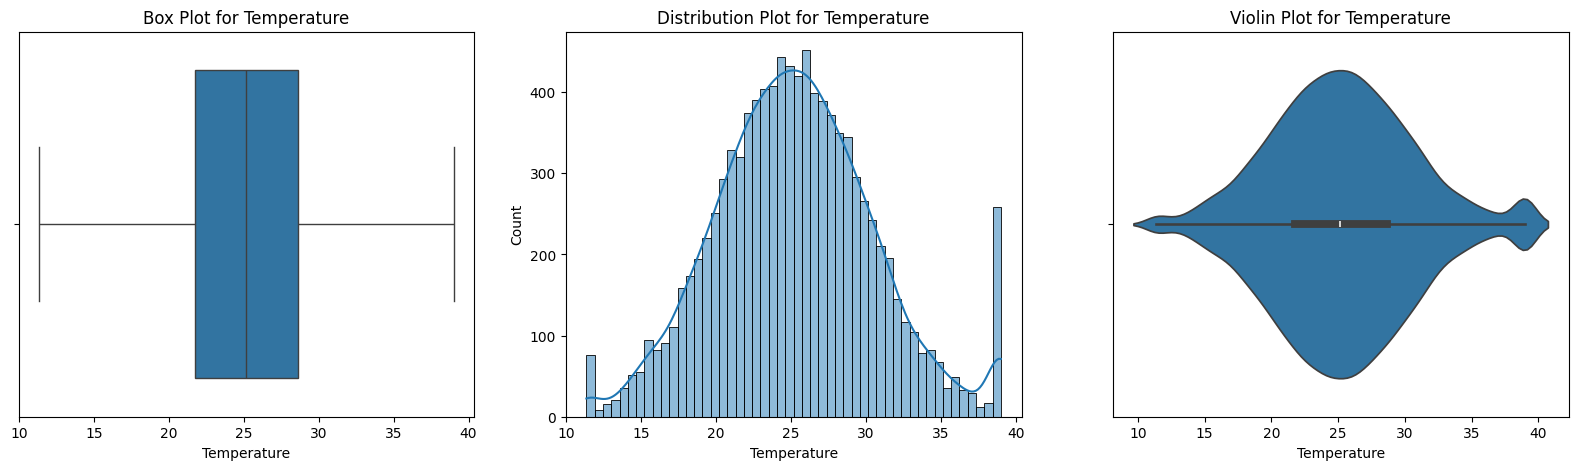

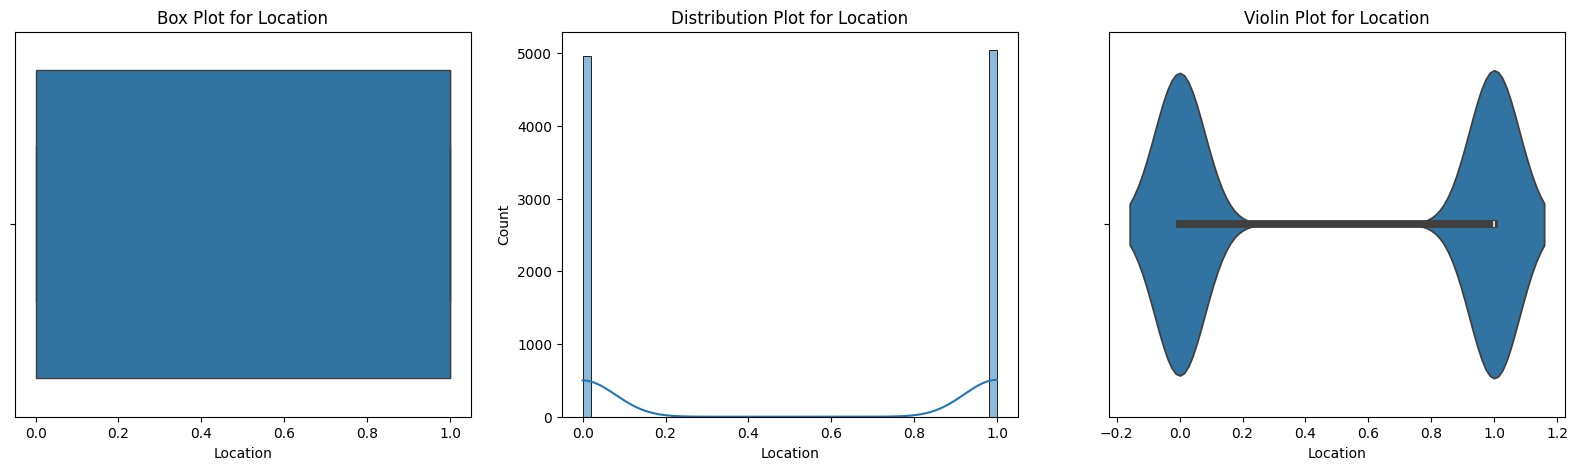

In [21]:
for i in ['Temperature','Location']:
    plot(df1, i)

In [22]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,10000.0,25.302077,5.356560,11.368729,21.736465,25.152475,28.648289,39.016025
Anomaly,10000.0,0.022900,0.149592,0.000000,0.000000,0.000000,0.000000,1.000000
Location,10000.0,0.504400,0.500006,0.000000,0.000000,1.000000,1.000000,1.000000


In [23]:
df1.dtypes

Timestamp       object
Temperature    float64
Anomaly          int64
Location         int64
dtype: object

In [24]:
df2 = df1.copy()
df2

,Timestamp,Temperature,Anomaly,Location
0,2024-06-01 19:50:28,24.476332,0,1
1,2024-06-01 19:50:28,18.253966,0,0
2,2024-06-01 19:50:28,14.953520,0,1
3,2024-06-01 19:50:28,17.667181,0,0
4,2024-06-01 19:50:28,17.079826,0,0
...,...,...,...,...
9995,2024-06-01 19:50:29,26.460733,0,0
9996,2024-06-01 19:50:29,22.027875,0,0
9997,2024-06-01 19:50:29,17.917821,0,0
9998,2024-06-01 19:50:29,23.730639,0,1


In [25]:
df2['date_time'] = pd.to_datetime(df2['Timestamp'])

In [26]:
df2.dtypes

Timestamp              object
Temperature           float64
Anomaly                 int64
Location                int64
date_time      datetime64[ns]
dtype: object

In [27]:
# after add the new column of 'Timestamp' drop the existing columns
df3 = df2.drop(columns=['Timestamp'])
df3

,Temperature,Anomaly,Location,date_time
0,24.476332,0,1,2024-06-01 19:50:28
1,18.253966,0,0,2024-06-01 19:50:28
2,14.953520,0,1,2024-06-01 19:50:28
3,17.667181,0,0,2024-06-01 19:50:28
4,17.079826,0,0,2024-06-01 19:50:28
...,...,...,...,...
9995,26.460733,0,0,2024-06-01 19:50:29
9996,22.027875,0,0,2024-06-01 19:50:29
9997,17.917821,0,0,2024-06-01 19:50:29
9998,23.730639,0,1,2024-06-01 19:50:29


<Axes: >

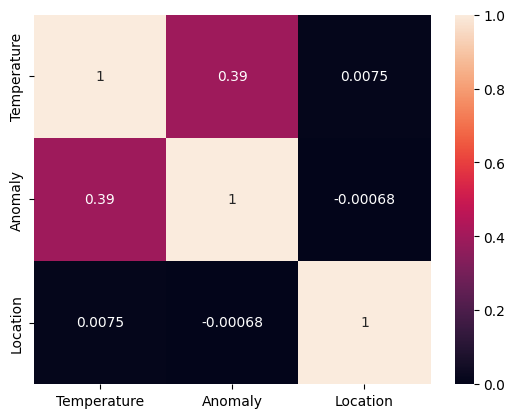

In [28]:
# Need to verify any columns are highly correlated using Heatmap. If any columns correalaion value >= 0.7 (absolute value), drop the columns.

col = ['Temperature','Anomaly','Location']
df_heatmap = df3[col].corr()
sns.heatmap(df_heatmap, annot=True)

In [29]:
df4 = df3.copy()
df4

,Temperature,Anomaly,Location,date_time
0,24.476332,0,1,2024-06-01 19:50:28
1,18.253966,0,0,2024-06-01 19:50:28
2,14.953520,0,1,2024-06-01 19:50:28
3,17.667181,0,0,2024-06-01 19:50:28
4,17.079826,0,0,2024-06-01 19:50:28
...,...,...,...,...
9995,26.460733,0,0,2024-06-01 19:50:29
9996,22.027875,0,0,2024-06-01 19:50:29
9997,17.917821,0,0,2024-06-01 19:50:29
9998,23.730639,0,1,2024-06-01 19:50:29


In [30]:
# split the day, month, and year from 'datetime' column and add dataframe (This data also help us to prediction)

df4['day'] = df4['date_time'].dt.day
df4['month'] = df4['date_time'].dt.month
df4['year'] = df4['date_time'].dt.year
df4['hour'] = df4['date_time'].dt.hour
df4['minute'] = df4['date_time'].dt.minute
df4['second'] = df4['date_time'].dt.second

In [31]:
df4

,Temperature,Anomaly,Location,date_time,day,month,year,hour,minute,second
0,24.476332,0,1,2024-06-01 19:50:28,1,6,2024,19,50,28
1,18.253966,0,0,2024-06-01 19:50:28,1,6,2024,19,50,28
2,14.953520,0,1,2024-06-01 19:50:28,1,6,2024,19,50,28
3,17.667181,0,0,2024-06-01 19:50:28,1,6,2024,19,50,28
4,17.079826,0,0,2024-06-01 19:50:28,1,6,2024,19,50,28
...,...,...,...,...,...,...,...,...,...,...
9995,26.460733,0,0,2024-06-01 19:50:29,1,6,2024,19,50,29
9996,22.027875,0,0,2024-06-01 19:50:29,1,6,2024,19,50,29
9997,17.917821,0,0,2024-06-01 19:50:29,1,6,2024,19,50,29
9998,23.730639,0,1,2024-06-01 19:50:29,1,6,2024,19,50,29


In [32]:
df5 = df4.drop(columns=['date_time'])
df5

,Temperature,Anomaly,Location,day,month,year,hour,minute,second
0,24.476332,0,1,1,6,2024,19,50,28
1,18.253966,0,0,1,6,2024,19,50,28
2,14.953520,0,1,1,6,2024,19,50,28
3,17.667181,0,0,1,6,2024,19,50,28
4,17.079826,0,0,1,6,2024,19,50,28
...,...,...,...,...,...,...,...,...,...
9995,26.460733,0,0,1,6,2024,19,50,29
9996,22.027875,0,0,1,6,2024,19,50,29
9997,17.917821,0,0,1,6,2024,19,50,29
9998,23.730639,0,1,1,6,2024,19,50,29


In [33]:
df5.dtypes

Temperature    float64
Anomaly          int64
Location         int64
day              int32
month            int32
year             int32
hour             int32
minute           int32
second           int32
dtype: object

In [34]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle

In [35]:
df5.Anomaly.value_counts()

Anomaly
0    9771
1     229
Name: count, dtype: int64

In [36]:
X = df5.drop('Anomaly', axis=1)
y = df5['Anomaly']

In [ ]:
#Balancing the dataset using smoteENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [ ]:
X.shape, y.shape, X_resampled.shape, y_resampled.shape

In [37]:
# check the accuracy of training and testing using metrics
# algorithm.__name__  - it return the algorithm name

def machine_learning_classification(X_resampled,y_resampled, algorithm):

    model = algorithm().fit(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm'    : algorithm.__name__,
                        'accuracy_train': accuracy_train,
                        'accuracy_test' : accuracy_test}

    return accuracy_metrics

In [38]:
print(machine_learning_classification(X,y, DecisionTreeClassifier))
print(machine_learning_classification(X,y, ExtraTreesClassifier))
print(machine_learning_classification(X,y, RandomForestClassifier))
print(machine_learning_classification(X,y, AdaBoostClassifier))
print(machine_learning_classification(X,y, GradientBoostingClassifier))
print(machine_learning_classification(X,y, XGBClassifier))

{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 0.99875, 'accuracy_test': 0.9975}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 0.99875, 'accuracy_test': 0.9975}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 0.99875, 'accuracy_test': 0.9975}


C:\Users\91916\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.99875, 'accuracy_test': 0.9975}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.99875, 'accuracy_test': 0.9975}
{'algorithm': 'XGBClassifier', 'accuracy_train': 0.99475, 'accuracy_test': 0.994}


In [ ]:
#Gridsearch for XGB classifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 2, 3]
}

grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

In [ ]:
# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

In [ ]:
# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", accuracy)

In [39]:
# passing the parameters in the random forest algorithm and check the accuracy for training and testing

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = XGBClassifier(colsample_bytree= 0.8, gamma=0, learning_rate=0.01, max_depth= 3, min_child_weight=1, n_estimators= 200, subsample= 0.8).fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test

(0.994875, 0.9945)

In [40]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# predict the status and check the accuracy using metrics

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = XGBClassifier(colsample_bytree= 0.8, gamma=0, learning_rate=0.01, max_depth= 3, min_child_weight=1, n_estimators= 200, subsample= 0.8).fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1959
           1       0.79      1.00      0.88        41

    accuracy                           0.99      2000
   macro avg       0.89      1.00      0.94      2000
weighted avg       1.00      0.99      0.99      2000

[[1948   11]
 [   0   41]]
Accuracy: 0.99


In [41]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

0.9971924451250639


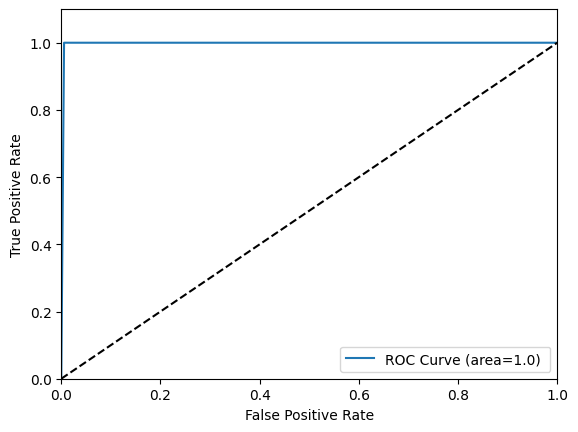

In [42]:
plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [43]:
# will pass the user data manually to check the prediction of status ar our model

user_data = np.array([[24.4,1,1,6,2024,19,50,28]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('1')
else:
    print('0')

0


In [45]:
# will pass the user data manually to check the prediction of status ar our model

user_data = np.array([[39.0,0,1,6,2024,19,50,28]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('1')
else:
    print('0')

1


In [46]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X,y, cv=5, scoring='accuracy')
print(cv_scores)
print(f"Cross-validation accuracy: {cv_scores.mean()}")

[0.9925 0.9945 0.995  0.9945 0.9945]
Cross-validation accuracy: 0.9942
